# Introduction

This dataset contains information about 10,000 movies collected from The Movie Database(TMDb), including user ratings and revenue. The questions I am trying to answer are:

    Which genres are most popular from year to year?
    Which movies are popular year by year?



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Wrangling
General Properties

Loading data:


In [3]:
movies_df = pd.read_csv("tmdb-movies.csv")

In [4]:
movies_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

In [7]:
movies_df.drop(del_col, axis=1, inplace=True)

In [8]:
movies_df.duplicated().sum()

1

In [9]:
movies_df.drop_duplicates(keep="first", inplace=True)

In [10]:
movies_df

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015
...,...,...,...,...,...,...,...,...,...,...
10861,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,NaN,95,Documentary,6/15/66,1966
10862,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,176,Action|Adventure|Drama,12/21/66,1966
10863,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,NaN,94,Mystery|Comedy,1/1/66,1966
10864,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,WOODY ALLEN STRIKES BACK!,80,Action|Comedy,11/2/66,1966


In [11]:
#select rows with zero
rows_with_zero = ["budget","revenue"]

#replcae zero with NaN
movies_df[rows_with_zero] = movies_df[rows_with_zero].replace(0, np.NaN)

In [12]:
movies_df[rows_with_zero]

,budget,revenue
0,150000000.0,1.513529e+09
1,150000000.0,3.784364e+08
2,110000000.0,2.952382e+08
3,200000000.0,2.068178e+09
4,190000000.0,1.506249e+09
...,...,...
10861,NaN,NaN
10862,NaN,NaN
10863,NaN,NaN
10864,NaN,NaN


In [13]:
#drop rows with NaN
movies_df.dropna(subset=rows_with_zero, inplace=True)

In [14]:
movies_df.shape

(3854, 10)

In [15]:
movies_df

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015
...,...,...,...,...,...,...,...,...,...,...
10822,7500000.0,3.373669e+07,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,You are cordially invited to George and Martha...,131,Drama,6/21/66,1966
10828,3000000.0,1.300000e+07,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,It tears you apart with suspense!,128,Mystery|Thriller,7/13/66,1966
10829,4653000.0,6.000000e+06,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,It's the Big One with the Big Two,120,Action|Western,12/17/66,1966
10835,12000000.0,2.000000e+07,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,This is the heroic story of the men on the U.S...,182,Action|Adventure|Drama|War|Romance,12/20/66,1966


# Data Wrangling

In [16]:
#check runtime have any "zero"(0) values

count = 0
for i in movies_df["runtime"]:
    if i == 0:
        count+=1
print(count)

0


In [17]:
#convert "release date" into Datetime formate
movies_df["release_date"] = pd.to_datetime(movies_df["release_date"])

In [18]:
movies_df

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015
...,...,...,...,...,...,...,...,...,...,...
10822,7500000.0,3.373669e+07,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,You are cordially invited to George and Martha...,131,Drama,2066-06-21,1966
10828,3000000.0,1.300000e+07,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,It tears you apart with suspense!,128,Mystery|Thriller,2066-07-13,1966
10829,4653000.0,6.000000e+06,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,It's the Big One with the Big Two,120,Action|Western,2066-12-17,1966
10835,12000000.0,2.000000e+07,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,This is the heroic story of the men on the U.S...,182,Action|Adventure|Drama|War|Romance,2066-12-20,1966


In [19]:
#shwoing the datatypes of all the columns
movies_df.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [20]:
# movies_df["budget"] = movies_df["budget"].astype(int)
# movies_df["revenue"] = movies_df["revenue"].astype(int)

# another method

change_type = ["budget", "revenue"]
movies_df[change_type] = movies_df[change_type].applymap(np.int64) 

In [21]:
movies_df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [22]:
#not necessary but doing bcz of practice
#change their name because they are in US Dollars
movies_df.rename(columns = {"budget":"budget_in_(us-Dollar)", "revenue": "revenue_in_(us-Dollar)"}, inplace=True) 

In [23]:
movies_df.head(2)

,budget_in_(us-Dollar),revenue_in_(us-Dollar),original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


# Exploratory Data Analysis

In [24]:
#it will place our series in the last 
# movies_df["profit"] = movies_df["revenue_in_(us-Dollar)"] - movies_df["budget_in_(us-Dollar)"] 
# movies_df

In [25]:
#another Method
#it will palce our series on 2nd place
movies_df.insert(2, "profit_in_(US_Dollars)", movies_df["revenue_in_(us-Dollar)"] - movies_df["budget_in_(us-Dollar)"])

In [26]:
movies_df.head(2)

,budget_in_(us-Dollar),revenue_in_(us-Dollar),profit_in_(US_Dollars),original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [27]:
def highest_lowest(col_name):
    try:
        highest = movies_df[col_name].idxmax()
    #     print("highest", highest)
        highest_detail = movies_df.loc[highest]
        lowest = movies_df[col_name].idxmin()
    #     print("lowest", lowest)
        lowest_detail = movies_df.loc[lowest]
        concat = pd.concat([highest_detail, lowest_detail], axis = 1)
        return concat
    except:
        return "Data type is 'Object' Can't perform operation , it's only for int65"
highest_lowest("profit_in_(US_Dollars)")

,1386,2244
budget_in_(us-Dollar),237000000,425000000
revenue_in_(us-Dollar),2781505847,11087569
profit_in_(US_Dollars),2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


In [28]:
highest_lowest("runtime")

,2107,5162
budget_in_(us-Dollar),18000000,10
revenue_in_(us-Dollar),871279,5
profit_in_(US_Dollars),-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


In [29]:
highest_lowest("genres")

"Data type is 'Object' Can't perform operation , it's only for int65"

In [30]:
#find average runtime of all movie
def avg_runtime(col_name):
    try:
        return movies_df[col_name].mean()
    except:
        return "Data type is 'Object' Can't perform operation , it's only for int65"

In [31]:
avg_runtime("runtime")

109.22029060716139

Populating the interactive namespace from numpy and matplotlib


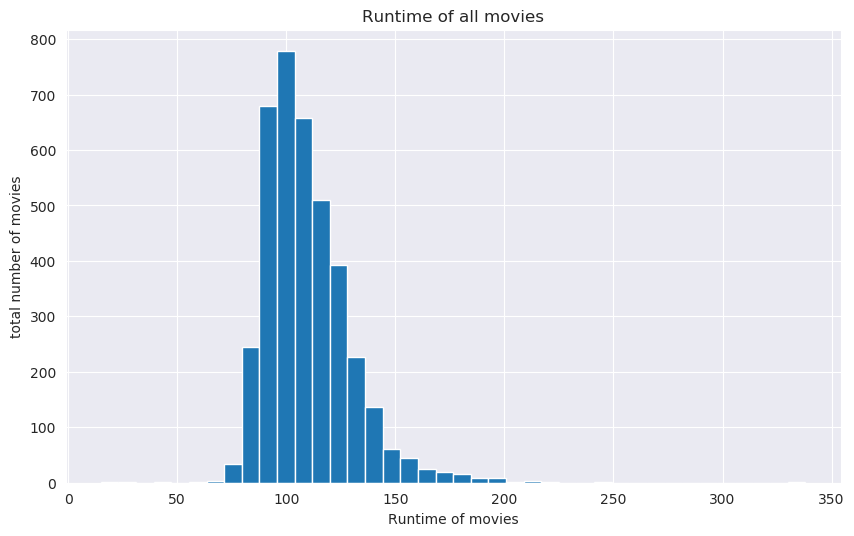

In [32]:
%pylab inline
sns.set_style('darkgrid')
plt.figure(figsize=(10,6), dpi = 100)
plt.xlabel("Runtime of movies", )
plt.ylabel("total number of movies")
plt.title("Runtime of all movies")
plt.hist(movies_df["runtime"], bins=40)
plt.show()

In [33]:
profit_in_each_year = movies_df.groupby("release_year")["profit_in_(US_Dollars)"].sum()

Populating the interactive namespace from numpy and matplotlib


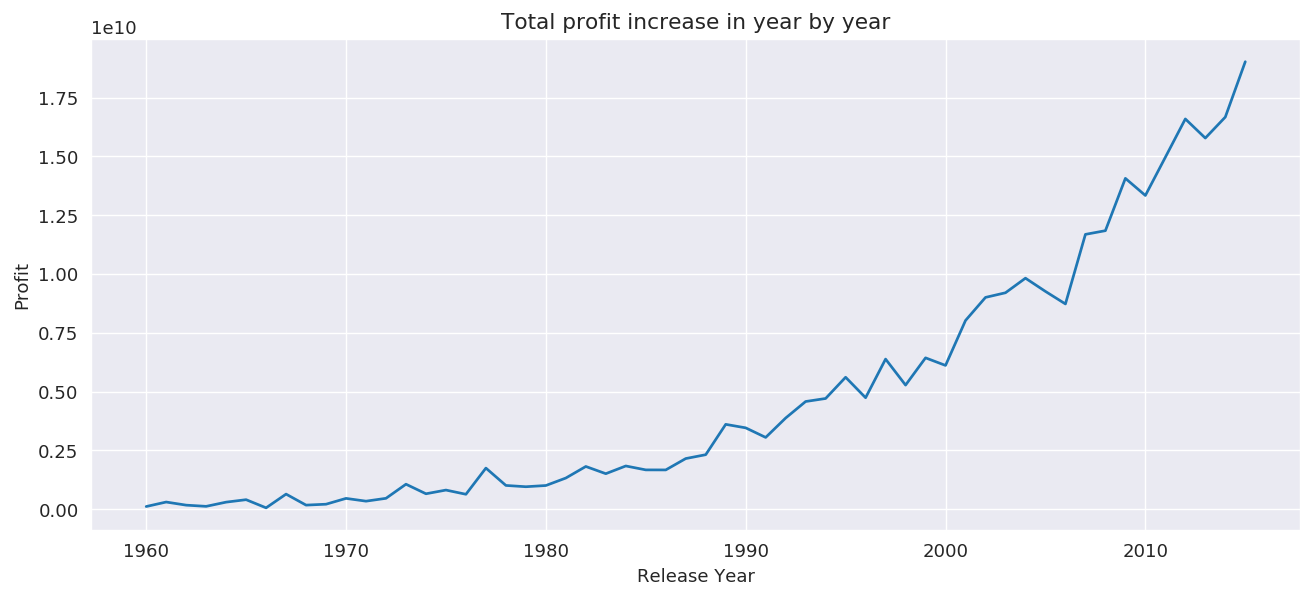

In [34]:
%pylab inline
plt.figure(figsize=(12,5), dpi = 130)
plt.xlabel("Release Year")
plt.ylabel("Profit")
plt.title("Total profit increase in year by year")
plt.plot(profit_in_each_year)
plt.show()

In [53]:
profit_in_each_year = pd.DataFrame(profit_in_each_year)

In [60]:
profit_in_each_year.tail()

,profit_in_(US_Dollars)
release_year,
2011,14966694704
2012,16596845507
2013,15782743325
2014,16676201357
2015,19032145273


In [65]:
#movies who have 50M+ profit
profit_movie_data = movies_df[movies_df['profit_in_(US_Dollars)'] >= 50000000]

In [66]:
profit_movie_data

,budget_in_(us-Dollar),revenue_in_(us-Dollar),profit_in_(US_Dollars),original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015
...,...,...,...,...,...,...,...,...,...,...,...
10756,20000000,187884007,167884007,Jaws 2,Roy Scheider|Lorraine Gary|Murray Hamilton|Jos...,Jeannot Szwarc,Just when you thought it was safe to go back i...,116,Horror|Thriller,1978-06-16,1978
10757,650000,55000000,54350000,Dawn of the Dead,David Emge|Ken Foree|Scott H. Reiniger|Gaylen ...,George A. Romero,"When there's no more room in hell, the dead wi...",127,Horror,1978-09-02,1978
10758,55000000,300218018,245218018,Superman,Marlon Brando|Gene Hackman|Christopher Reeve|N...,Richard Donner,You'll Believe a Man Can Fly!,143,Adventure|Fantasy|Action|Science Fiction,1978-12-14,1978
10759,300000,70000000,69700000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,John Carpenter,The Night HE Came Home!,91,Horror|Thriller,1978-10-25,1978


In [67]:
profit_movie_data.index = range(len(profit_movie_data))

In [68]:
print(profit_movie_data.index)

RangeIndex(start=0, stop=1338, step=1)


In [69]:
profit_movie_data.index = profit_movie_data.index + 1

In [70]:
profit_movie_data.index

RangeIndex(start=1, stop=1339, step=1)

In [71]:
profit_movie_data.head(2)

,budget_in_(us-Dollar),revenue_in_(us-Dollar),profit_in_(US_Dollars),original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [72]:
len(profit_movie_data)

1338

In [80]:
def find_average(col_name):
    try:
        return profit_movie_data[col_name].mean()
    except:
        return "String hai Integer nahi"

In [81]:
find_average("cast")

'String hai Integer nahi'

In [83]:
#average runtime
find_average("runtime")

113.66741405082212

In [87]:
#average revenue
find_average('revenue_in_(us-Dollar)')

254957662.59491777

In [91]:
#average profit
find_average('profit_in_(US_Dollars)')

194512704.83408073

In [156]:
# def extract_data(column_name):
#     #will take a column, and separate the string by '|'
#     all_data = profit_movie_data[column_name].str.cat(sep = '|')
    
#     #giving pandas series and storing the values separately
#     all_data = pd.Series(all_data.split('|'))
    
#     #this will us value in descending order
#     count = all_data.value_counts(ascending = False)
    
#     return count

In [110]:
all_data = profit_movie_data["director"].str.cat(sep = '|')
all_data

'Colin Trevorrow|George Miller|Robert Schwentke|J.J. Abrams|James Wan|Alejandro GonzÃ¡lez IÃ±Ã¡rritu|Alan Taylor|Ridley Scott|Kyle Balda|Pierre Coffin|Pete Docter|Sam Mendes|Chris Columbus|Joss Whedon|Quentin Tarantino|Olivier Megaton|Peyton Reed|Kenneth Branagh|Francis Lawrence|Antoine Fuqua|Brad Peyton|Sam Taylor-Johnson|Adam McKay|Christopher McQuarrie|Seth MacFarlane|Matthew Vaughn|Tom McCarthy|Wes Ball|Neill Blomkamp|Elizabeth Banks|Steven Spielberg|Rob Letterman|Peter Sohn|John Crowley|F. Gary Gray|Breck Eisner|Tim Johnson|Jake Schreier|Nancy Meyers|Baltasar KormÃ¡kur|Denis Villeneuve|Paul Feig|Glenn Ficarra|John Requa|Ryan Coogler|Judd Apatow|Steve Martino|Genndy Tartakovsky|John Francis Daley|Jonathan M. Goldstein|Gil Kenan|Joel Edgerton|Sean Anders|Andy Fickman|Jeremy Garelick|M. Night Shyamalan|Simon Curtis|Jason Moore|Gregory Jacobs|Gregory Plotkin|Paul Tibbitt|Levan Gabriadze|Leigh Whannell|Etan Cohen|John Madden|David Gelb|Alex Kendrick|Christopher Nolan|James Gunn|Joe Rus

In [111]:
all_data = pd.Series(all_data.split("|"))
all_data

0        Colin Trevorrow
1          George Miller
2       Robert Schwentke
3            J.J. Abrams
4              James Wan
              ...       
1452      Jeannot Szwarc
1453    George A. Romero
1454      Richard Donner
1455      John Carpenter
1456         John Landis
Length: 1457, dtype: object

In [112]:
count = all_data.value_counts()
count

Steven Spielberg     23
Robert Zemeckis      13
Clint Eastwood       12
Tim Burton           11
Ron Howard           10
                     ..
Kirk Jones            1
Harold Becker         1
John Polson           1
Robert Stevenson      1
Peter Billingsley     1
Length: 664, dtype: int64

In [151]:
genres = profit_movie_data["genres"].str.cat(sep = '|')
genres

'Action|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Thriller|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Fantasy|Action|Crime|Thriller|Western|Drama|Adventure|Thriller|Science Fiction|Action|Thriller|Adventure|Drama|Adventure|Science Fiction|Family|Animation|Adventure|Comedy|Comedy|Animation|Family|Action|Adventure|Crime|Action|Comedy|Science Fiction|Action|Adventure|Science Fiction|Crime|Drama|Mystery|Western|Crime|Action|Thriller|Science Fiction|Action|Adventure|Romance|Fantasy|Family|Drama|War|Adventure|Science Fiction|Action|Drama|Action|Drama|Thriller|Drama|Romance|Comedy|Drama|Action|Comedy|Crime|Comedy|Action|Adventure|Drama|Thriller|History|Action|Science Fiction|Thriller|Crime|Action|Science Fiction|Comedy|Music|Thriller|Drama|Adventure|Horror|Comedy|Adventure|Animation|Comedy|Family|Fantasy|Drama|Romance|Drama|Music|Fantasy|Action|Adventure|Fantasy|Comedy|Animation|Science Fiction|Family|Drama|Mystery|Romance|Comedy|Adventure|Dr

In [153]:
genre_alag = pd.Series(genres.split("|"))
genre_alag

0                Action
1             Adventure
2       Science Fiction
3              Thriller
4                Action
             ...       
3769             Action
3770    Science Fiction
3771             Horror
3772           Thriller
3773             Comedy
Length: 3774, dtype: object

In [154]:
genre_count = genre_alag.value_counts(ascending=False)
genre_count

Comedy             492
Drama              481
Action             464
Thriller           405
Adventure          379
Family             229
Romance            215
Science Fiction    206
Fantasy            201
Crime              193
Horror             123
Animation          122
Mystery            113
Music               47
War                 46
History             39
Western             14
Documentary          4
Foreign              1
dtype: int64

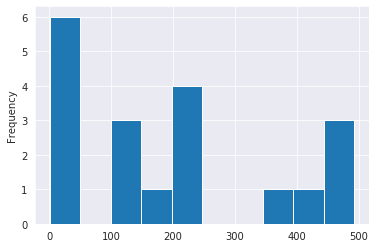

In [133]:
genre.sort_values().plot(kind = "hist")

Populating the interactive namespace from numpy and matplotlib


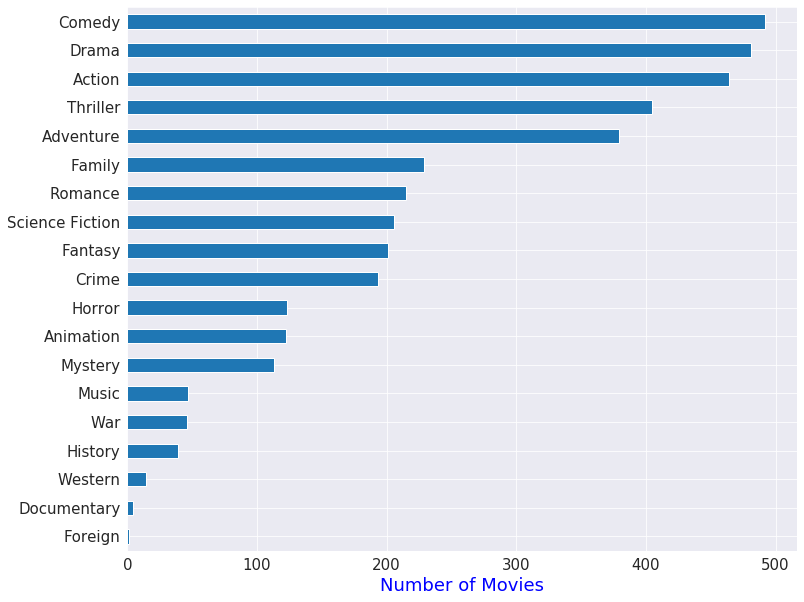

In [175]:
%pylab inline
pl = genres_count.sort_values(ascending = True, inplace = True)
pl = genres_count.plot.barh(fontsize = 15)
pl.set_xlabel('Number of Movies', color = 'b', fontsize = '18')
pl.figure.set_size_inches(12, 10)